In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
ins_data = pd.read_csv("/content/insurance.csv")

In [ ]:
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
ins_data.shape

(1338, 7)

In [ ]:
ins_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features:
1. region
2. sex
3. smoker

In [ ]:
ins_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
ins_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
ins_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
ins_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

NUmerical features

In [ ]:
sns.set()

<ipython-input-34-d95250534f2f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_data["age"])


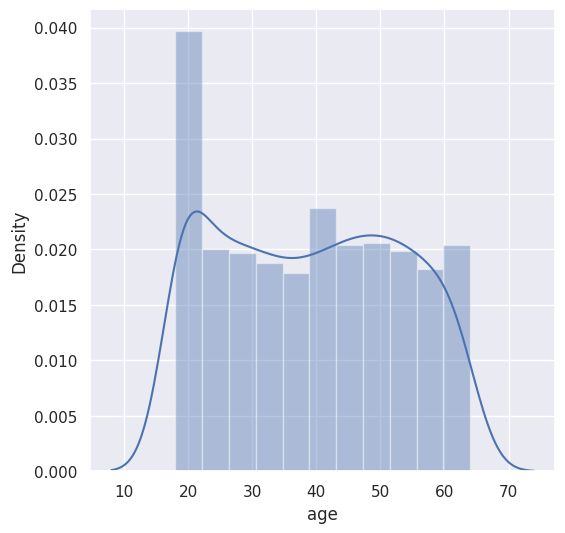

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(ins_data["age"])
plt.show()

<ipython-input-35-412f52b12132>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_data["bmi"])


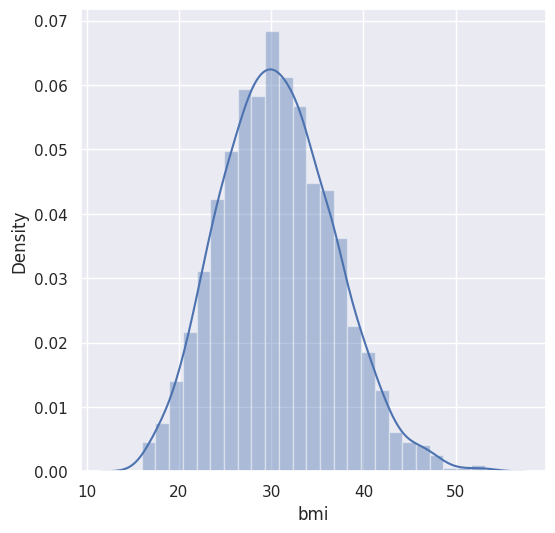

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(ins_data["bmi"])
plt.show()

<ipython-input-36-6ada2913dbf3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ins_data["charges"])


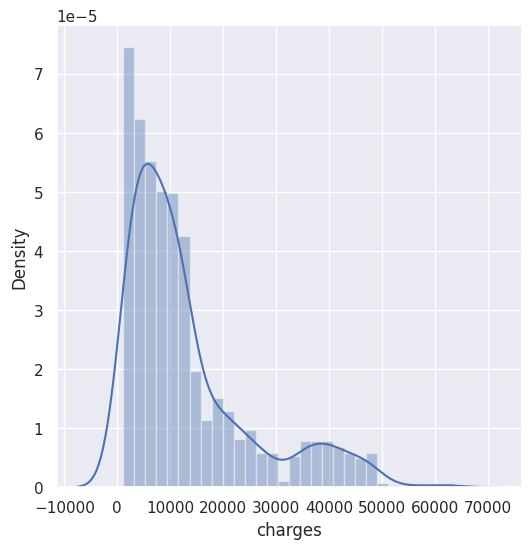

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(ins_data["charges"])
plt.show()

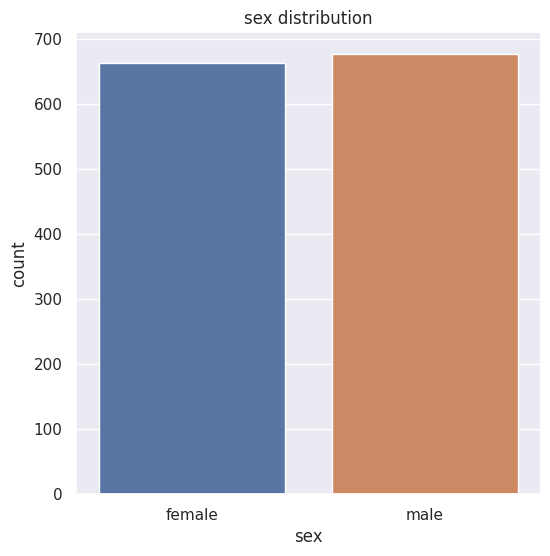

In [ ]:
plt.figure(figsize=(6,6))
plt.title("sex distribution")
sns.countplot(x = "sex", data = ins_data)
plt.show()

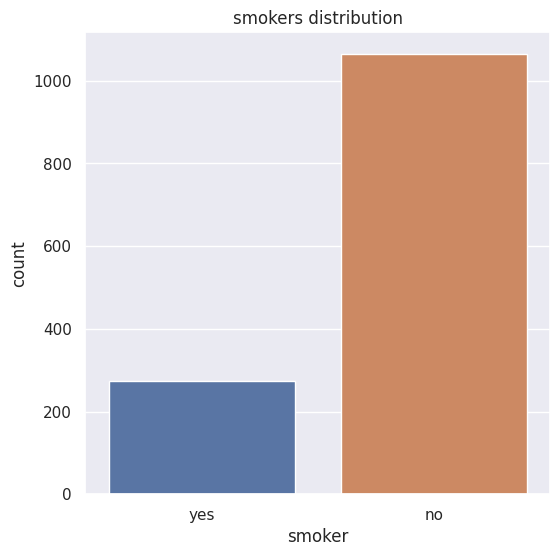

In [ ]:
plt.figure(figsize=(6,6))
plt.title("smokers distribution")
sns.countplot(x = "smoker", data = ins_data)
plt.show()

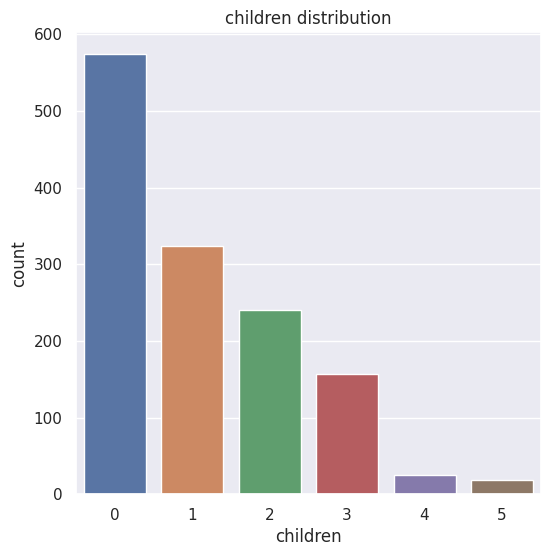

In [ ]:
plt.figure(figsize=(6,6))
plt.title("children distribution")
sns.countplot(x = "children", data = ins_data)
plt.show()

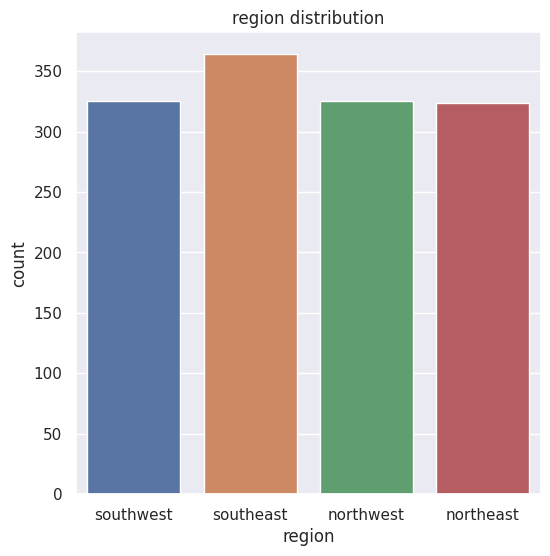

In [ ]:
plt.figure(figsize=(6,6))
plt.title("region distribution")
sns.countplot(x = "region", data = ins_data)
plt.show()

#label incoding

In [ ]:
ins_data.replace({"sex": {"female":0, "male":1}, "region":{"southwest":0, "southeast":1, "northwest":2, "northeast":3}, "smoker":{"no":0, "yes":1}}, inplace = True)
ins_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


dividing into features and target

In [ ]:
X = ins_data.drop(columns="charges", axis=1 )
Y = ins_data["charges"]

In [ ]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       0
1      18    1  33.770         1       0       1
2      28    1  33.000         3       0       1
3      33    1  22.705         0       0       2
4      32    1  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       2
1334   18    0  31.920         0       0       3
1335   18    0  36.850         0       0       1
1336   21    0  25.800         0       0       0
1337   61    0  29.070         0       1       2

[1338 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


#splitting into training and testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


#Model Training


In [ ]:
model = LinearRegression()

Model evaluation on training data

In [ ]:
model.fit(X_train, Y_train)


LinearRegression()

In [ ]:
#pred on training data
pred_train_data = model.predict(X_train)



In [ ]:
#rscored value
r2_train = metrics.r2_score(Y_train, pred_train_data)
print("r2_score on training data :",r2_train )

r2_score on training data : 0.7530732192579026


In [ ]:
# pred on testing data

pred_test_data = model.predict(X_test)
print(type(pred_test_data))



<class 'numpy.ndarray'>


In [ ]:
#r2 score
r2_test = metrics.r2_score(Y_test, pred_test_data)
print("r2_score on training data :",r2_test )

r2_score on training data : 0.7406256738597919


#predictive system

In [ ]:
# inp_data = ins_data.iloc[0, :-1]
inp_data =[31,1,25.74,0,1,0]

In [ ]:
type(inp_data)

list

In [ ]:
data2 = np.asarray(inp_data)
data3= data2.reshape(1,-1)

In [ ]:
prediction = model.predict(data3)
print("The predicted cost is:", prediction[0])

The predicted cost is: 27044.056838536864


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[27044.05683854]
The insurance cost is USD  27044.056838536864


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
